In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from utils.plotting_BGM import plot_results
from utils.feature_reduction import *

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

In [11]:
df = pd.read_csv('data/ex.csv')

dataset = df.copy()

In [12]:
X_PCA = dataset.values
X_TSNE = dataset.values
x = dataset['x'].values
y = dataset['y'].values

def plot_dataset(x, y):
  plt.scatter(x, y, label='Data')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

# plot_dataset(x, y)

### PCA

Principal component analysis (PCA). [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

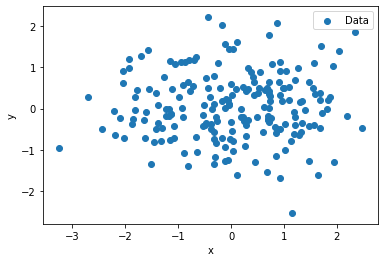

In [13]:
transformed_X = pca_reduction(X_PCA, 2, True)

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.20)

plot_dataset(x_test[:,0], x_test[:,1])

X = x_test


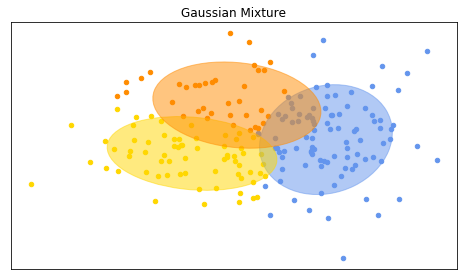

In [14]:
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, 'Gaussian Mixture')

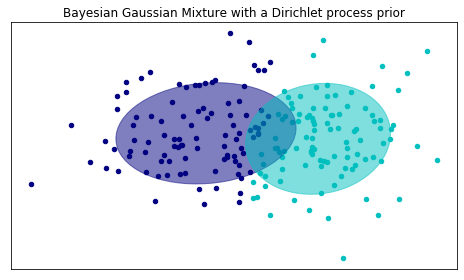

In [15]:
# Fit a Dirichlet process Gaussian mixture using five components
bgm = BayesianGaussianMixture(n_components=3, covariance_type='full').fit(X)
plot_results(X, bgm.predict(X), bgm.means_, bgm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

### TSNE 

t-distributed Stochastic Neighbor Embedding. [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples. For more tips see Laurens van der Maaten’s FAQ [2].

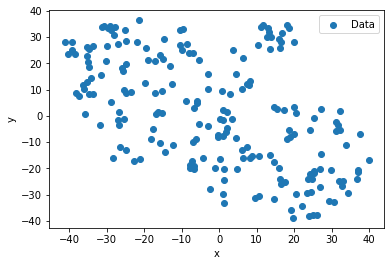

In [16]:
transformed_X = tsne_reduction(X_TSNE, 2, 2000)

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.20)

plot_dataset(x_test[:,0], x_test[:,1])

X = x_test

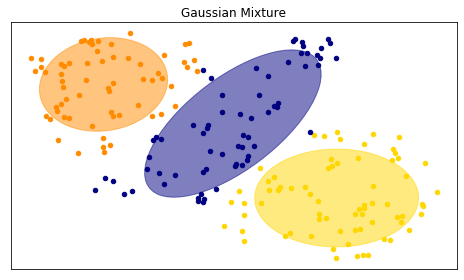

In [17]:
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, 'Gaussian Mixture')

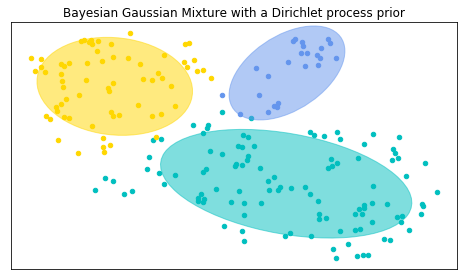

In [18]:
# Fit a Dirichlet process Gaussian mixture using five components
bgm = BayesianGaussianMixture(n_components=3, covariance_type='full').fit(X)
plot_results(X, bgm.predict(X), bgm.means_, bgm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')